In [2]:
import pandas as pd
import os

import numpy as np
import sklearn

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=100):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
### LOAD THE DATA ###

In [3]:
import pandas as pd

def load_data():
    
    f=open("kddcup.names.txt",'r')
    data=f.readlines()[1:]

    column_names=[]
    for line in data:
        column_names.append(line.split(':')[0])

    column_names.append('target')
    f.close()

    f=open("training_attack_types2.txt","r")
    data=f.readlines()

    attack_type_mapping={'normal':'normal'}
    for line in data:
        k,v=line.split()
        attack_type_mapping[k]=v

    f.close()

    temp=pd.read_csv('kddcup.data_10_percent.gz',names=column_names)
    attack_type_mapping.keys()
    print(attack_type_mapping)
    for key, value in attack_type_mapping.items() :
        print (key, value)
    temp['target']=temp.target.apply(lambda r: attack_type_mapping[r[:-1]])
    
    return temp

In [ ]:
### GENERAL STRUCTURE OF THE DATA ###

In [4]:
ids=load_data()
ids.head()

{'normal': 'normal', 'back': 'dos', 'buffer_overflow': 'u2r', 'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'imap': 'r2l', 'ipsweep': 'probe', 'land': 'dos', 'loadmodule': 'u2r', 'multihop': 'r2l', 'neptune': 'dos', 'nmap': 'probe', 'perl': 'u2r', 'phf': 'r2l', 'pod': 'dos', 'portsweep': 'probe', 'rootkit': 'u2r', 'satan': 'probe', 'smurf': 'dos', 'spy': 'r2l', 'teardrop': 'dos', 'warezclient': 'r2l', 'warezmaster': 'r2l'}
normal normal
back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [5]:
ids.shape

(494021, 42)

In [6]:
ids.drop_duplicates(inplace=True)

In [7]:
ids.shape

(145585, 42)

In [8]:
ids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145585 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     145585 non-null  int64  
 1   protocol_type                145585 non-null  object 
 2   service                      145585 non-null  object 
 3   flag                         145585 non-null  object 
 4   src_bytes                    145585 non-null  int64  
 5   dst_bytes                    145585 non-null  int64  
 6   land                         145585 non-null  int64  
 7   wrong_fragment               145585 non-null  int64  
 8   urgent                       145585 non-null  int64  
 9   hot                          145585 non-null  int64  
 10  num_failed_logins            145585 non-null  int64  
 11  logged_in                    145585 non-null  int64  
 12  num_compromised              145585 non-null  int64  
 13 

In [9]:
ids.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,145585.000000,1.455850e+05,1.455850e+05,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,...,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000
mean,132.026088,7.995754e+03,2.859800e+03,0.000137,0.020201,0.000048,0.100175,0.000515,0.491493,0.026177,...,181.469416,129.935563,0.553219,0.061389,0.092819,0.019048,0.291599,0.290980,0.110464,0.107676
std,1224.161209,1.820390e+06,6.081000e+04,0.011720,0.239369,0.010150,1.426803,0.028586,0.499929,3.311384,...,99.097409,114.714725,0.456236,0.147021,0.241112,0.060410,0.452493,0.453448,0.306098,0.304221
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,78.000000,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.470000e+02,1.050000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,117.000000,0.770000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.880000e+02,1.165000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.030000,0.020000,1.000000,1.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Saving figure attribute_histogram_plots


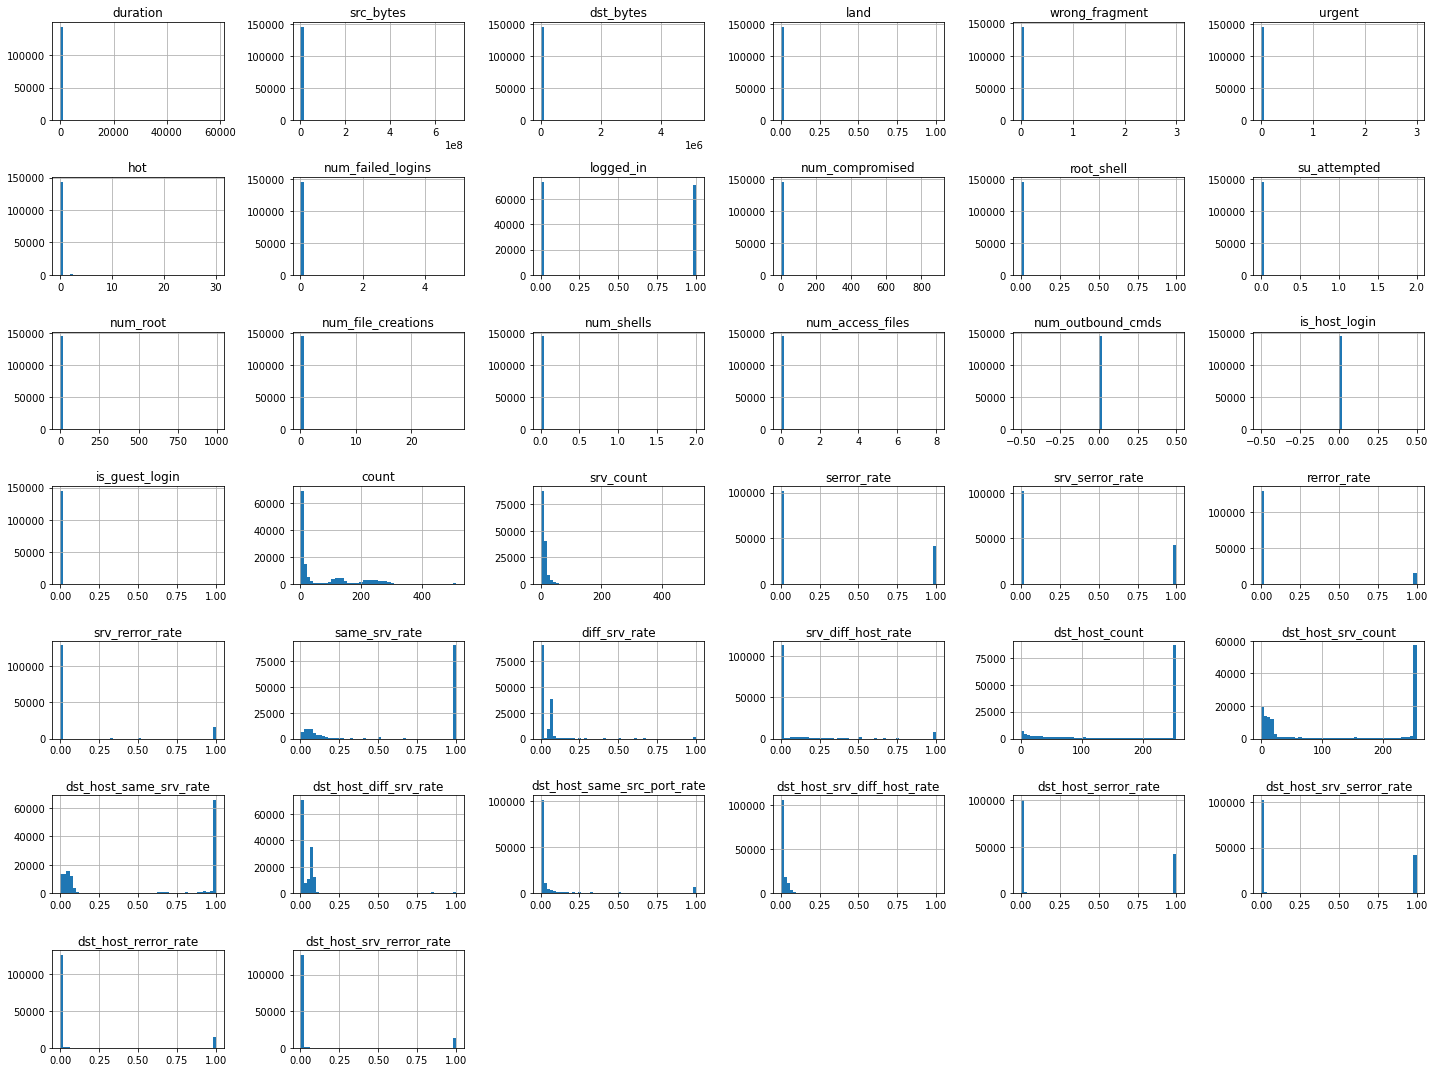

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

ids.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

Saving figure Categorical Column visualization


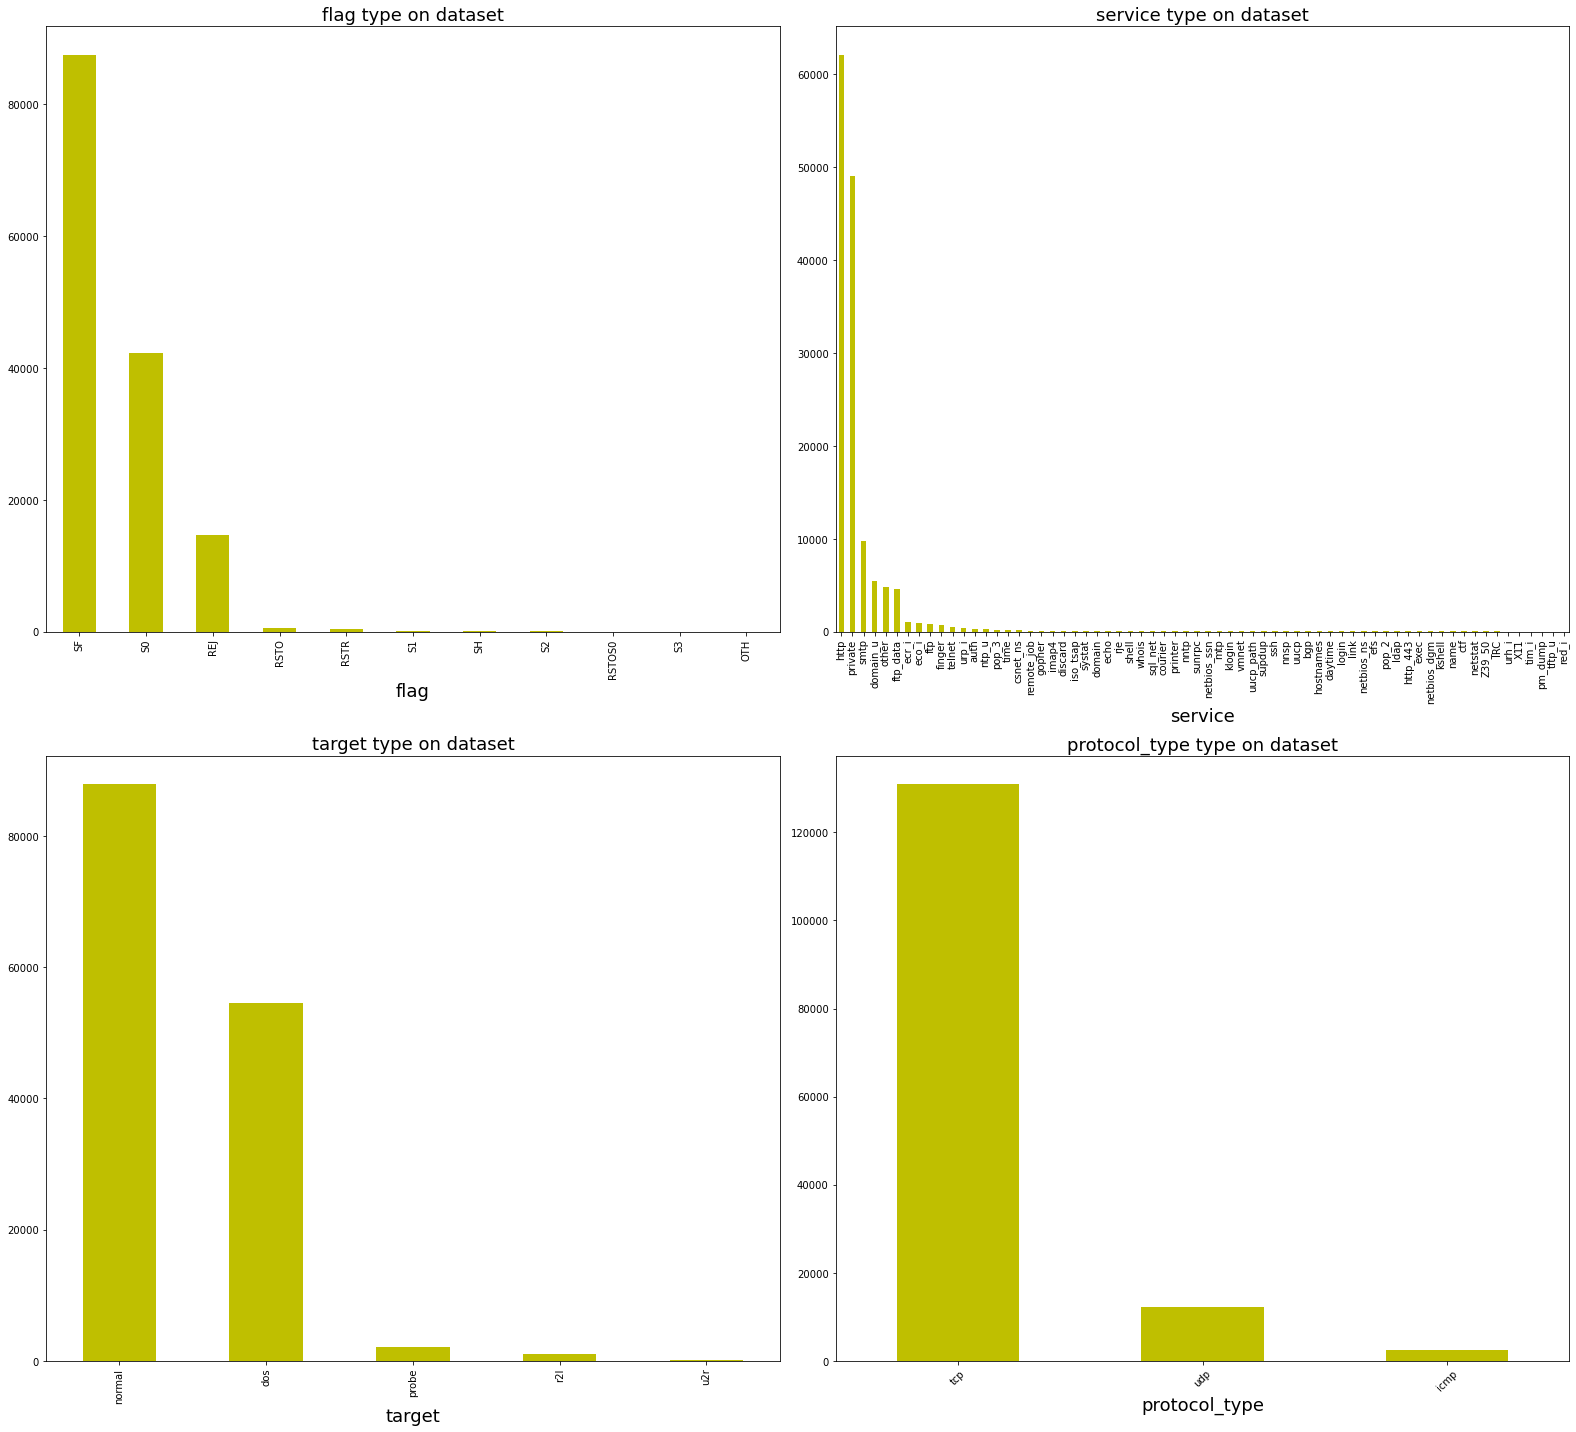

In [11]:
categorical_features = ['flag', 'service', 'target', 'protocol_type']
def plot_dist(col, ax):
    ids[col].value_counts().plot(kind='bar', facecolor='y', ax=ax)
    ax.set_xlabel('{}'.format(col), fontsize=18)
    ax.set_title("{} type on dataset".format(col), fontsize= 18)
    plt.xticks(rotation=45)
    return ax

f, ax = plt.subplots(2,2, figsize = (22,20))
f.tight_layout(h_pad=15, w_pad=10, rect=[0, 0.08, 1, 0.93])

k = 0
for i in range(2):
    for j in range(2):
        plot_dist(categorical_features[k], ax[i][j])
        k += 1

save_fig('Categorical Column visualization')
plt.show()

In [ ]:
### Attacks after grouping them to attack categories ###

## normal - no attack
## dos - denial of service attack
## probe - probing attack
## r2l - remote to user attack
## u2r - user to root attack

In [12]:
ids['target'].value_counts()

normal    87832
dos       54572
probe      2130
r2l         999
u2r          52
Name: target, dtype: int64

<AxesSubplot:>

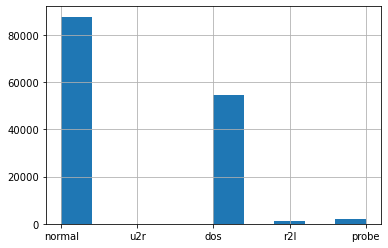

In [13]:
ids['target'].hist()

In [ ]:
### SPLITTING DATASET TO TEST AND VALIDATION SETS ###

In [14]:
from sklearn.model_selection import train_test_split

train_set,strat_test_set = train_test_split(ids,test_size=0.2,random_state=42,stratify=ids['target'])
strat_train_set,strat_val_set=train_test_split(train_set,test_size=0.2,random_state=42,stratify=train_set['target'])

In [15]:
strat_test_set["target"].value_counts() / len(strat_test_set)

normal    0.603290
dos       0.374867
probe     0.014631
r2l       0.006869
u2r       0.000343
Name: target, dtype: float64

In [16]:
ids['target'].value_counts() / len(ids)

normal    0.603304
dos       0.374846
probe     0.014631
r2l       0.006862
u2r       0.000357
Name: target, dtype: float64

In [ ]:
### DATA ANALYSIS AND VISUALISATION ###

In [78]:
ids = strat_train_set.copy()

Saving figure Protocol type per attack


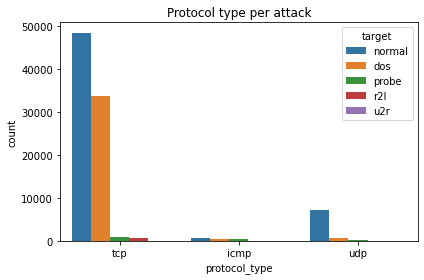

In [79]:
import seaborn as sns

sns.countplot(x = 'protocol_type',hue = "target",data = ids).set(title='Protocol type per attack')
save_fig("Protocol type per attack")
plt.show()

Saving figure Guest login per attack


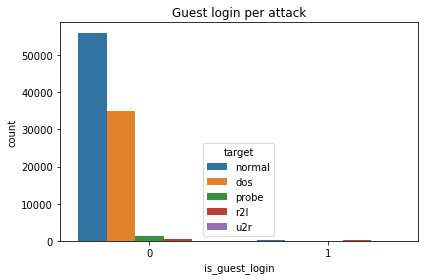

In [80]:
import seaborn as sns

sns.countplot(x = 'is_guest_login',hue = "target",data = ids).set(title='Guest login per attack')
save_fig("Guest login per attack")
plt.show()

Saving figure Land status per attack


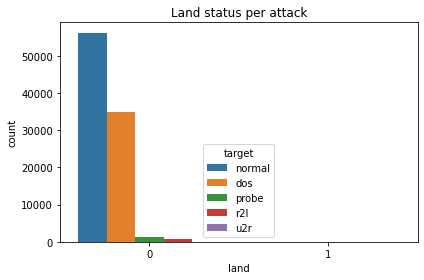

In [81]:
import seaborn as sns

sns.countplot(x = 'land',hue = "target",data = ids).set(title='Land status per attack')
save_fig("Land status per attack")
plt.show()

In [82]:
### CORRELATION MATRIX ###

Saving figure Correlation MATRIX


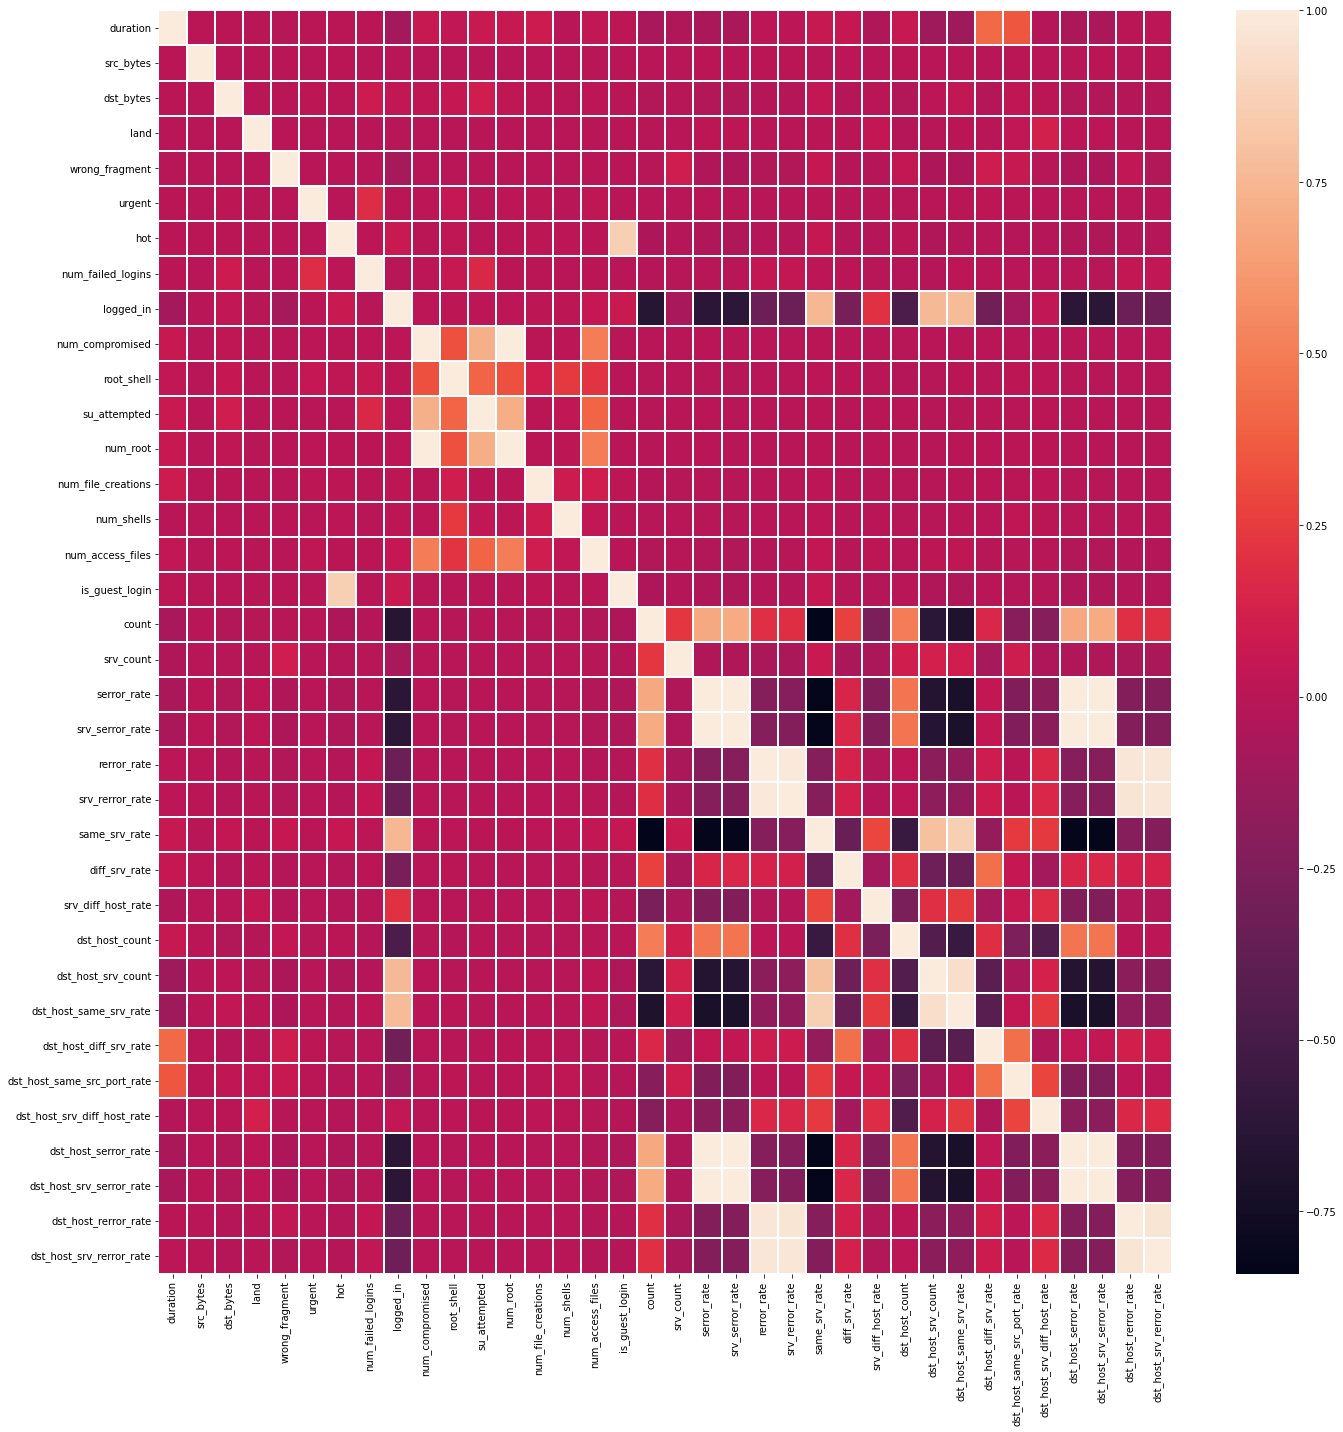

In [83]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize =(20,20)) 

corr_matrix=ids.drop(['num_outbound_cmds','is_host_login'],axis=1).corr()
sns.heatmap(corr_matrix,ax = ax, linewidths = 0.2)

save_fig('Correlation MATRIX')
plt.show()

In [84]:
# ids['num_root'].corr(ids['num_compromised'])
# This variable is highly correlated with num_compromised and should be ignored.
# (Correlation = 0.9963131797054336)
ids.drop('num_root',axis = 1,inplace = True)

# ids['srv_serror_rate'].corr(ids['serror_rate'])
# This variable is highly correlated with serror_rate and should be ignored.
# (Correlation = 0.9945252278234321)
ids.drop('srv_serror_rate',axis = 1,inplace = True)

# ids['srv_rerror_rate'].corr(ids['rerror_rate'])
# This variable is highly correlated with rerror_rate and should be ignored.
# (Correlation = 0.9947309539817937)
ids.drop('srv_rerror_rate',axis = 1, inplace=True)

# ids['dst_host_srv_serror_rate'].corr(ids['srv_serror_rate'])
# This variable is highly correlated with srv_serror_rate and should be ignored.
# (Correlation = 0.9993041091850098)
ids.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

# ids['dst_host_serror_rate'].corr(ids['rerror_rate'])
# This variable is highly correlated with rerror_rate and should be ignored.
# (Correlation = 0.9869947924956001)
ids.drop('dst_host_serror_rate',axis = 1, inplace=True)

# ids['dst_host_rerror_rate'].corr(ids['srv_rerror_rate'])
# This variable is highly correlated with srv_rerror_rate and should be ignored.
# (Correlation = 0.9821663427308375)
ids.drop('dst_host_rerror_rate',axis = 1, inplace=True)

# ids['dst_host_srv_rerror_rate'].corr(ids['rerror_rate'])
# This variable is highly correlated with rerror_rate and should be ignored.
# (Correlation = 0.9851995540751249)
ids.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

# ids['dst_host_same_srv_rate'].corr(ids['dst_host_srv_count'])
# This variable is highly correlated with dst_host_srv_count and should be ignored.
# (Correlation = 0.9736854572953938)
ids.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

# This variable has all instances the same and should be ignored.
ids.drop(['num_outbound_cmds','is_host_login'],axis=1,inplace=True)

In [85]:
ids.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target
90308,0,tcp,http,SF,183,2333,0,0,0,0,...,0.0,1.00,0.00,0.0,5,255,0.00,0.20,0.02,normal
378975,0,tcp,private,S0,0,0,0,0,0,0,...,0.0,0.06,0.05,0.0,255,8,0.05,0.00,0.00,dos
80287,0,tcp,http,SF,359,700,0,0,0,0,...,0.0,1.00,0.00,0.0,255,255,0.00,0.00,0.00,normal
481062,0,icmp,urp_i,SF,183,0,0,0,0,0,...,0.0,0.88,0.25,0.0,255,23,0.01,0.11,0.00,normal
349283,0,tcp,http,REJ,0,0,0,0,0,0,...,1.0,1.00,0.00,0.0,2,37,0.00,0.50,0.38,normal


In [ ]:
### DATA PRE-PROCESSING BASED ON PREVIOUS RESULTS ###

In [24]:
ids=strat_train_set.drop(['target','num_root','srv_serror_rate','srv_rerror_rate','dst_host_srv_serror_rate','dst_host_srv_rerror_rate',
                          'dst_host_serror_rate','dst_host_rerror_rate','dst_host_same_srv_rate','num_outbound_cmds','is_host_login'],axis=1)
ids_labels=strat_train_set['target'].copy()

In [25]:
from sklearn.preprocessing import LabelEncoder

target_encoder=LabelEncoder()
target_encoder.fit(ids_labels)
ids_labels=target_encoder.transform(ids_labels)

In [ ]:
### Missing values handling

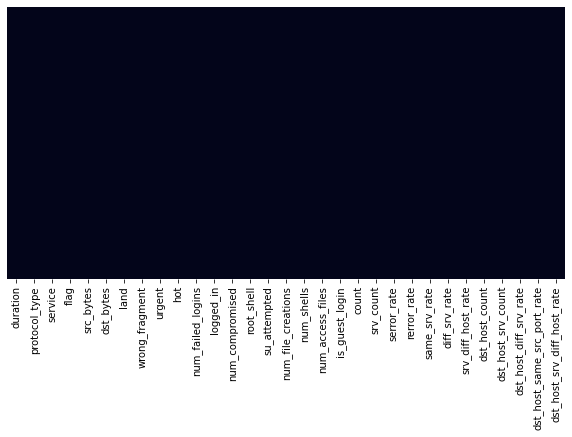

In [26]:
import seaborn as sns

%matplotlib inline
plt.figure(figsize=(10,5))
sns.heatmap(ids.isnull(),yticklabels=False,cbar=False)

plt.show()

In [ ]:
### ENCODING NON-NUMBER VALUES AND CATEGORIES ###

In [27]:
ids_cat=ids[['flag', 'service', 'protocol_type']]
ids_cat.head(10)

,flag,service,protocol_type
90308,SF,http,tcp
378975,S0,private,tcp
80287,SF,http,tcp
481062,SF,urp_i,icmp
349283,REJ,http,tcp
357370,S0,private,tcp
23902,SF,http,tcp
78495,SF,http,tcp
460364,REJ,ssh,tcp
383565,S0,private,tcp


In [28]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
ids_cat_1hot = cat_encoder.fit_transform(ids_cat)
ids_cat_1hot

<93174x79 sparse matrix of type '<class 'numpy.float64'>'
	with 279522 stored elements in Compressed Sparse Row format>

In [29]:
ids_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [30]:
ids_cat_1hot.shape

(93174, 79)

In [31]:
cat_encoder.categories_

[array(['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3',
        'SF', 'SH'], dtype=object),
 array(['IRC', 'X11', 'Z39_50', 'auth', 'bgp', 'courier', 'csnet_ns',
        'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i',
        'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher',
        'hostnames', 'http', 'http_443', 'imap4', 'iso_tsap', 'klogin',
        'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm',
        'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u',
        'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private',
        'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh',
        'sunrpc', 'supdup', 'systat', 'telnet', 'tim_i', 'time', 'urh_i',
        'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois'], dtype=object),
 array(['icmp', 'tcp', 'udp'], dtype=object)]

In [ ]:
### DETECT ANY OUTLIERS IN THE DATASET ###

In [32]:
ids_num=ids.drop(['flag', 'service','protocol_type'],axis=1)
ids_num.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
90308,0,183,2333,0,0,0,0,0,1,0,...,0.0,0.0,1.00,0.00,0.0,5,255,0.00,0.20,0.02
378975,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.06,0.05,0.0,255,8,0.05,0.00,0.00
80287,0,359,700,0,0,0,0,0,1,0,...,0.0,0.0,1.00,0.00,0.0,255,255,0.00,0.00,0.00
481062,0,183,0,0,0,0,0,0,0,0,...,0.0,0.0,0.88,0.25,0.0,255,23,0.01,0.11,0.00
349283,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.00,0.00,0.0,2,37,0.00,0.50,0.38


In [33]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest()
outlier_pred = isolation_forest.fit_predict(ids_num)

ids_clean = ids[outlier_pred == 1]
ids_labels_clean = ids_labels[outlier_pred == 1]

In [34]:
ids_clean.shape,ids_labels_clean.shape

((87185, 31), (87185,))

In [ ]:
### TRANSFORMER PIPELINE ###

In [35]:
from sklearn.preprocessing import StandardScaler

standadizer=StandardScaler()
ids_num_tr=standadizer.fit_transform(ids_num)

ids_num_tr

array([[-0.10782789, -0.0045491 , -0.00850249, ..., -0.41781426,
         0.44001943,  0.01745376],
       [-0.10782789, -0.00462958, -0.04887979, ..., -0.07964627,
        -0.38545887, -0.31650996],
       [-0.10782789, -0.0044717 , -0.03676487, ..., -0.41781426,
        -0.38545887, -0.31650996],
       ...,
       [-0.10782789, -0.00462958, -0.04887979, ...,  0.05562093,
        -0.38545887, -0.31650996],
       [-0.10782789, -0.0042694 , -0.04311655, ...,  3.64020168,
         0.44001943,  0.01745376],
       [-0.10782789, -0.00462958, -0.04887979, ...,  0.19088813,
        -0.38545887, -0.31650996]])

In [36]:
from sklearn.compose import ColumnTransformer

num_attribs = list(ids_num)
cat_attribs = ['flag', 'service','protocol_type']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ])

ids_prepared = full_pipeline.fit_transform(ids_clean)
ids_labels=ids_labels_clean.copy()

In [37]:
ids_prepared.shape

(87185, 104)

In [38]:
from collections import Counter
Counter(ids_labels)

Counter({1: 53084, 0: 33467, 2: 205, 3: 413, 4: 16})

In [39]:
ids_bin_labels=(ids_labels==1).astype(int)
# 0 - dos
# 1 - normal 
# 2 - r2l
# 3 - probe
# 4 - u2r

In [ ]:
### BINARY CLASSIFICATION

In [40]:
from sklearn.linear_model import LogisticRegression

sgd_clf=LogisticRegression(penalty='l1',solver='liblinear')
sgd_clf.fit(ids_prepared,ids_bin_labels)

LogisticRegression(penalty='l1', solver='liblinear')

In [41]:
from sklearn.metrics import confusion_matrix

ids_predictions=sgd_clf.predict(ids_prepared)
confusion_matrix(ids_bin_labels,ids_predictions)

array([[33950,   151],
       [   48, 53036]], dtype=int64)

In [42]:
x_val=strat_val_set.drop(['target','num_root','srv_serror_rate','srv_rerror_rate','dst_host_srv_serror_rate','dst_host_srv_rerror_rate',
                          'dst_host_serror_rate','dst_host_rerror_rate','dst_host_same_srv_rate','num_outbound_cmds','is_host_login'],axis=1)
y_val=strat_val_set['target'].copy()

x_val_prepared=full_pipeline.transform(x_val)
validation_prediction=sgd_clf.predict(x_val_prepared)

y_val=target_encoder.transform(y_val)
y_bin_val=(y_val==1).astype(int)

In [43]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

print(accuracy_score(y_bin_val,validation_prediction))
print(precision_score(y_bin_val,validation_prediction))
print(recall_score(y_bin_val,validation_prediction))
confusion_matrix(y_bin_val,validation_prediction)

0.9874645831544604
0.9847812301838935
0.9945919020849641


array([[ 9025,   216],
       [   76, 13977]], dtype=int64)

In [ ]:
### MODELS ###

In [44]:
#SOFTMAX REGRESSION

from sklearn.linear_model import LogisticRegression

softmax_reg=LogisticRegression(multi_class='multinomial',max_iter=1000)
softmax_reg.fit(ids_prepared,ids_labels)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [45]:
some_data = ids.iloc[:5]
some_labels = ids_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", softmax_reg.predict(some_data_prepared))

Predictions: [1 0 1 1 1]


In [46]:
print("Labels:", list(some_labels))

Labels: [1, 0, 1, 1, 0]


In [47]:
from sklearn.metrics import confusion_matrix

ids_predictions=softmax_reg.predict(ids_prepared)
confusion_matrix(ids_labels,ids_predictions)

array([[33452,    15,     0,     0,     0],
       [   10, 53054,     9,    10,     1],
       [    0,    52,   153,     0,     0],
       [    0,    36,     0,   377,     0],
       [    0,     7,     0,     3,     6]], dtype=int64)

In [48]:
#KNN CLASSIFIER

from sklearn.neighbors import KNeighborsClassifier

neigh_clf = KNeighborsClassifier()
neigh_clf.fit(ids_prepared,ids_labels)

KNeighborsClassifier()

In [49]:
from sklearn.metrics import confusion_matrix

ids_predictions=neigh_clf.predict(ids_prepared)
confusion_matrix(ids_labels,ids_predictions)

array([[33459,     7,     1,     0,     0],
       [    5, 53058,     5,    16,     0],
       [    1,    17,   187,     0,     0],
       [    0,    22,     0,   391,     0],
       [    0,    12,     0,     2,     2]], dtype=int64)

In [ ]:
### VERIFY WITH VALIDATION SET ###

In [50]:
x_val=strat_val_set.drop(['target','num_root','srv_serror_rate','srv_rerror_rate','dst_host_srv_serror_rate','dst_host_srv_rerror_rate',
                          'dst_host_serror_rate','dst_host_rerror_rate','dst_host_same_srv_rate','num_outbound_cmds','is_host_login'],axis=1)

y_val=strat_val_set['target'].copy()

x_val_prepared=full_pipeline.transform(x_val)
y_val=target_encoder.transform(y_val)

In [51]:
validation_prediction=softmax_reg.predict(x_val_prepared)

In [52]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

print(accuracy_score(y_val,validation_prediction))
print(precision_score(y_val,validation_prediction,average='weighted'))
print(recall_score(y_val,validation_prediction,average='weighted'))
confusion_matrix(y_val,validation_prediction)

0.9822271829655705
0.981821627163957
0.9822271829655705


array([[ 8564,   154,    13,     1,     0],
       [    6, 13958,    66,    21,     2],
       [   88,    26,   227,     0,     0],
       [    3,    30,     3,   124,     0],
       [    0,     1,     0,     0,     7]], dtype=int64)

In [53]:
validation_prediction=neigh_clf.predict(x_val_prepared)

In [54]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

print(accuracy_score(y_val,validation_prediction))
print(precision_score(y_val,validation_prediction,average='weighted'))
print(recall_score(y_val,validation_prediction,average='weighted'))
confusion_matrix(y_val,validation_prediction)

0.9742422941530008
0.9732249901326776
0.9742422941530008


array([[ 8474,   249,     1,     8,     0],
       [    1, 14001,    31,    20,     0],
       [   10,   186,    82,    63,     0],
       [    1,    24,     0,   135,     0],
       [    0,     5,     0,     1,     2]], dtype=int64)

In [ ]:
### GRID SEARCH FOR SOFTMAX REGRESSION TO OPTIMIZE PARAMETERS ###

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

params_grid=[
    {
        'penalty' : ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'multi_class' : ['multinomial'],
        'solver' : ['newton-cg', 'sag', 'saga'],
        'max_iter' : [1000]
    },
    {
        'penalty' : ['l1'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'multi_class' : ['multinomial'],
        'solver' : ['saga'],
        'max_iter' : [400]
    }
]

grid_search=GridSearchCV(softmax_reg,params_grid,cv=3,verbose=2,n_jobs=-1)
grid_search.fit(ids_prepared,ids_labels)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=1000,
                                          multi_class='multinomial'),
             n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'max_iter': [1000], 'multi_class': ['multinomial'],
                          'penalty': ['l2'],
                          'solver': ['newton-cg', 'sag', 'saga']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'max_iter': [400], 'multi_class': ['multinomial'],
                          'penalty': ['l1'], 'solver': ['saga']}],
             verbose=2)

In [56]:
best_params,best_score=grid_search.best_params_,grid_search.best_score_
best_params,best_score

({'C': 1000,
  'max_iter': 1000,
  'multi_class': 'multinomial',
  'penalty': 'l2',
  'solver': 'newton-cg'},
 0.9982221719023823)

In [ ]:
### RE-VERIFY WITH OPTIMIZED PARAMETERS ###

In [57]:
x_test=strat_test_set.drop(['target','num_root','srv_serror_rate','srv_rerror_rate','dst_host_srv_serror_rate','dst_host_srv_rerror_rate',
                          'dst_host_serror_rate','dst_host_rerror_rate','dst_host_same_srv_rate','num_outbound_cmds','is_host_login'],axis=1)

y_test=strat_test_set['target'].copy()

x_test_prepared=full_pipeline.transform(x_test)
y_test=target_encoder.transform(y_test)

In [60]:
test_prediction=grid_search.best_estimator_.predict(x_test_prepared)
f1_score(y_test,test_prediction,average='weighted')

0.9810586529379425

In [66]:

x_test_prepared.shape

(29117, 104)